# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


# Data Exploration

In [2]:
df=pd.read_csv('Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
df.isna().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


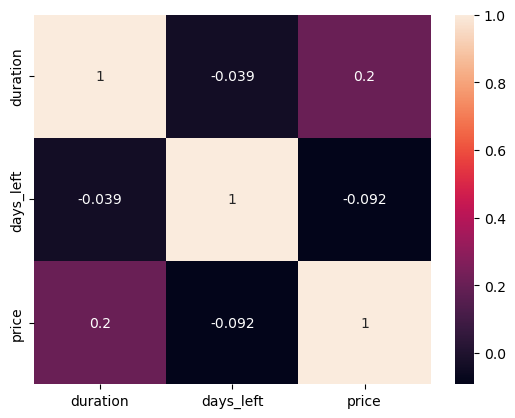

In [12]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
df.head()


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


### airline_colm

In [14]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [15]:
df['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [16]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

In [17]:
df1.head()

,flight,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6E-102,Indigo,39,39,39,39,39,39,39,39,39
1,6E-105,Indigo,5,5,5,5,5,5,5,5,5
2,6E-113,Indigo,49,49,49,49,49,49,49,49,49
3,6E-121,Indigo,20,20,20,20,20,20,20,20,20
4,6E-123,Indigo,5,5,5,5,5,5,5,5,5


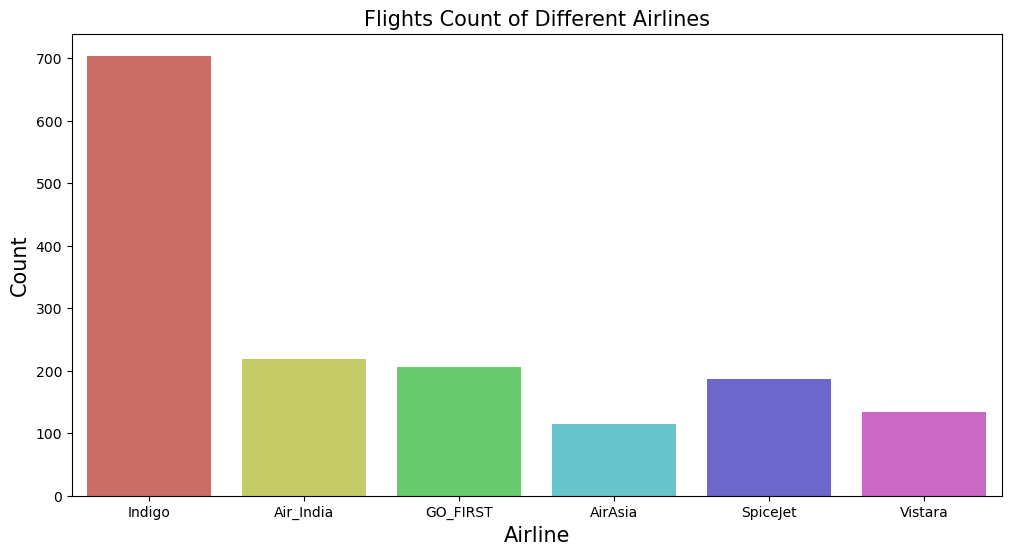

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=df1,x='airline',palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Most of the Airlines has Economic Class as common

In [45]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [46]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

In [20]:
df2=df.groupby(['airline','flight','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

### Does price vary with Airlines?



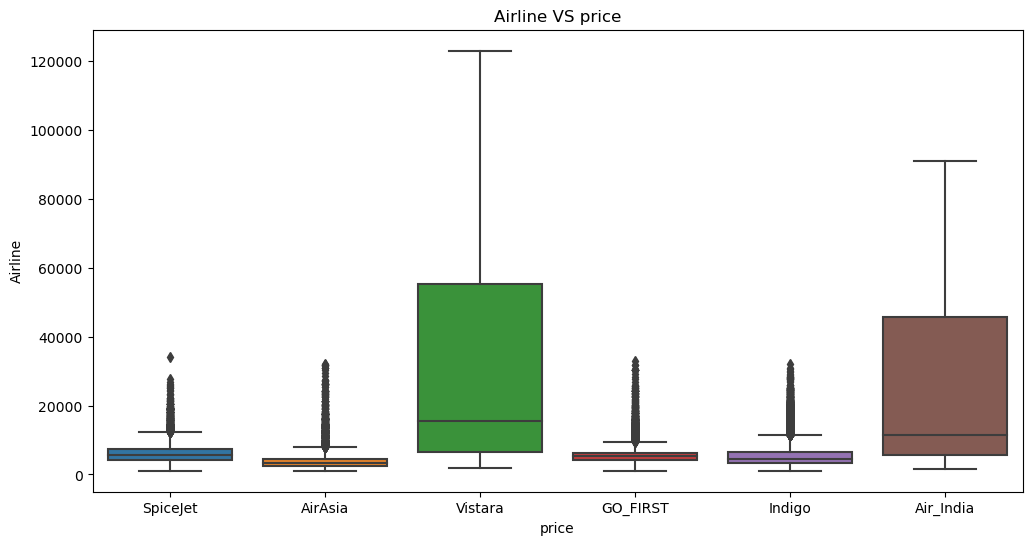

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='airline',y='price')
plt.title('Airline VS price')
plt.xlabel('price')
plt.ylabel('Airline')
plt.show()

How Does the Ticket Price vary between Economy and Business Class?

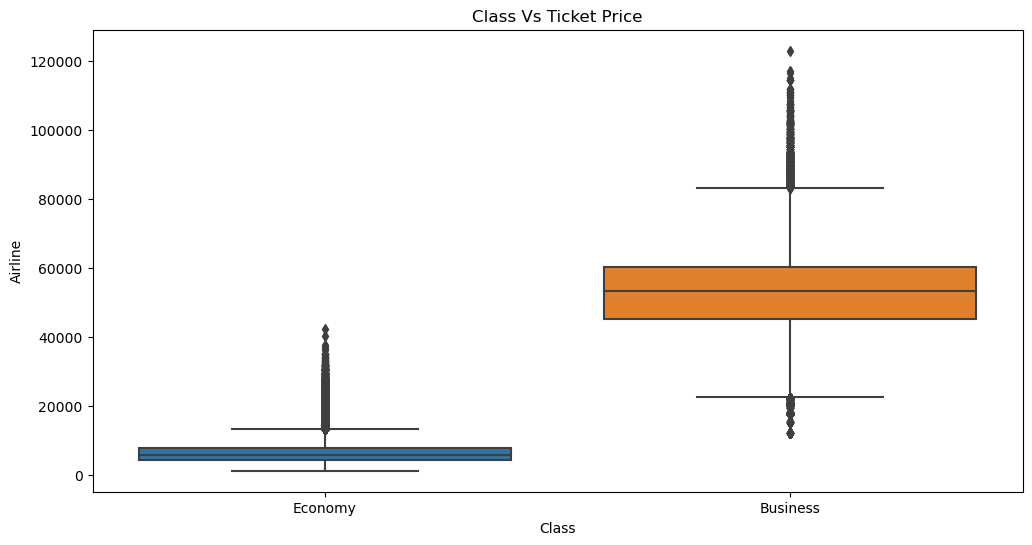

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='class',y='price')
plt.title('Class Vs Ticket Price')
plt.xlabel('Class')
plt.ylabel('Airline')
plt.show()

# Outlier Function with (I Q R _ stander deviation)


In [24]:
def check_outliers(colm,df):
    q1=df[colm].quantile(0.25)
    q3=df[colm].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    outliers = []
    
    for i in range(len(df)):
        value = df.loc[i,colm]
        if value > upper_bound or value < lower_bound :
            outliers.append(value)
    return outliers


In [25]:
def handle_outliers(colm,df):
    q1=df[colm].quantile(0.25)
    q3=df[colm].quantile(0.75)
    iqr=q3-q1
    lower_bound= q1-1.5*iqr
    upper_bound= q3+1.5*iqr
    
    for i in range (len(df)):
        if df.loc[i,colm] < lower_bound :
            df.loc[i,colm] = lower_bound
        elif  df.loc[i,colm] > upper_bound:
             df.loc[i,colm] = upper_bound 
                

In [28]:
check_outliers('price',df)

[114434,
 116562,
 100395,
 99129,
 101369,
 117307,
 105961,
 102114,
 102114,
 102114,
 102114,
 102114,
 110850,
 110872,
 102114,
 102114,
 102114,
 114507,
 104987,
 104466,
 104466,
 100288,
 100288,
 100473,
 100473,
 103335,
 99577,
 111437,
 99403,
 101531,
 102404,
 102404,
 105764,
 105764,
 105764,
 111163,
 114523,
 99403,
 100276,
 101844,
 101844,
 101844,
 105764,
 100276,
 102404,
 101531,
 100909,
 99677,
 108604,
 111964,
 106476,
 111964,
 100204,
 111883,
 99451,
 103819,
 99680,
 101920,
 105168,
 107576,
 100111,
 100671,
 101780,
 104031,
 107492,
 123071,
 102648,
 108360,
 102648,
 101780,
 101780,
 109217,
 102648,
 102648,
 102648,
 102648,
 102648,
 110936,
 99204,
 99327,
 104255,
 104255,
 99204,
 99327,
 107934,
 99551,
 105549,
 105638,
 105638,
 99389,
 105549,
 105638,
 106753,
 101612,
 105185,
 104255,
 106753,
 110225,
 114705,
 100539,
 115211,
 103683,
 99584,
 99584,
 101376,
 110218,
 101152,
 101824,
 103056,
 105744,
 109776,
 114704,
 105744

In [29]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


How Does the Ticket Price vary with the number of stops of a Flight?



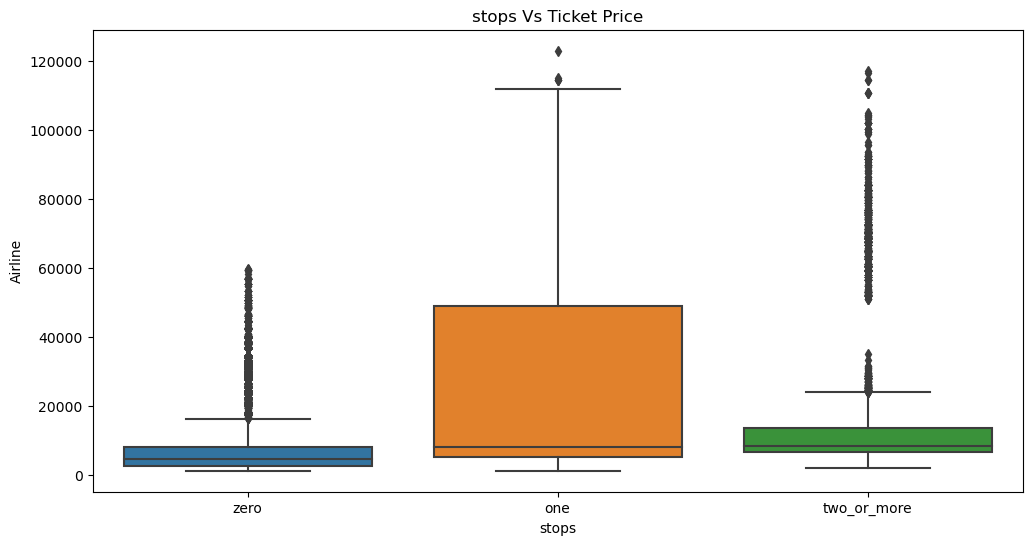

In [30]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='stops',y='price')
plt.title('stops Vs Ticket Price')
plt.xlabel('stops')
plt.ylabel('Airline')
plt.show()

### How the Ticket Price change based on the Departure Time and Arrival Time?
1. Departure Time Vs Ticket Price:
- Ticket Price is More for the Flights when the Departure Time is at Night
- Ticket Price is almost equal for flights Having Departure time at Early_morning , Morning and Evening
- Ticket Price is Low for the Flights Having Departure Time at Late_night


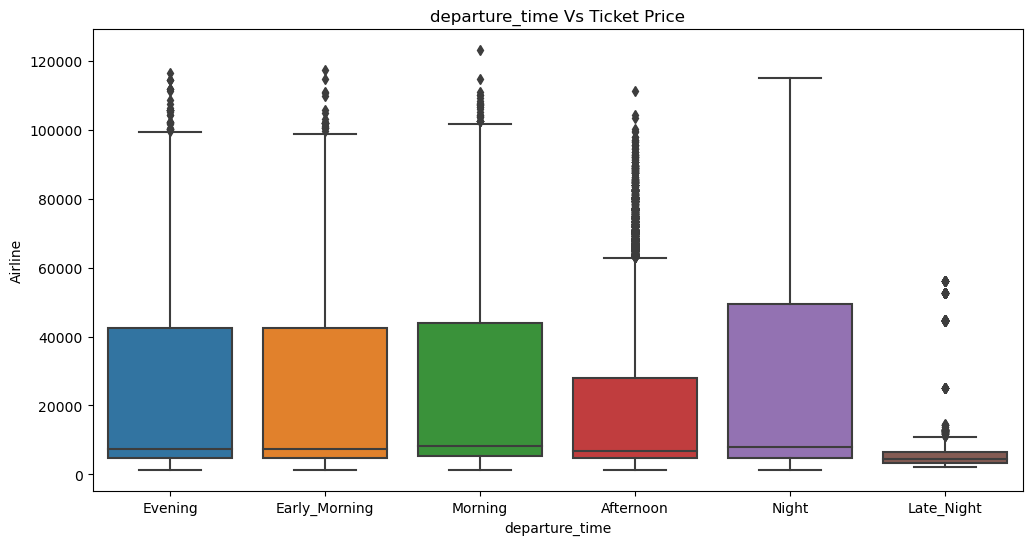

In [31]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='departure_time',y='price')
plt.title('departure_time Vs Ticket Price')
plt.xlabel('departure_time')
plt.ylabel('Airline')
plt.show()

2. arrival_time Time Vs Ticket Price:
- Ticket Price is More for the Flights when the Arrival Time is at Evening
- Ticket Price is almost equal for flights Having Arrival time is at Morning and Night
- Ticket Price is Low for the Flights Having Arrival Time at Late_night as same as Departure Time


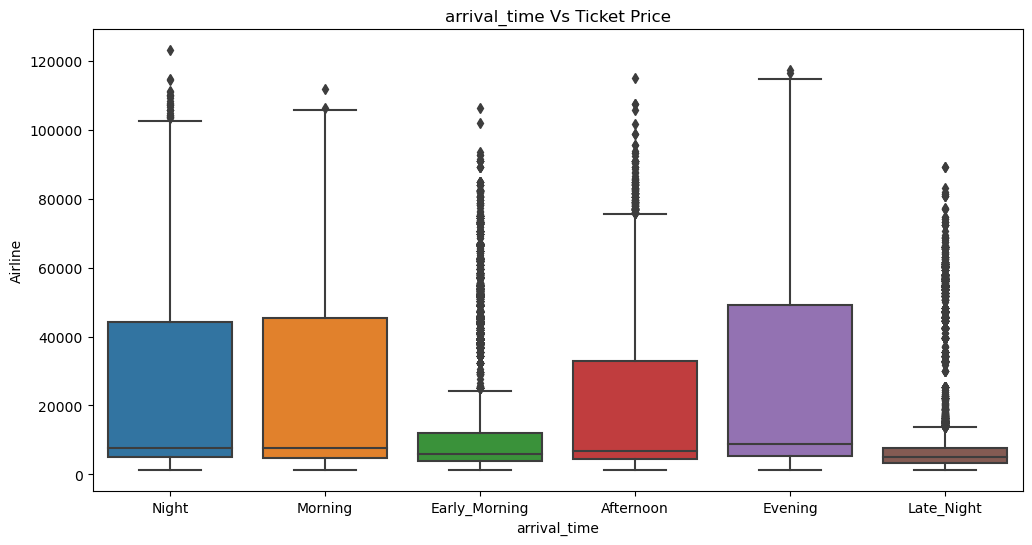

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='arrival_time',y='price')
plt.title('arrival_time Vs Ticket Price')
plt.xlabel('arrival_time')
plt.ylabel('Airline')
plt.show()

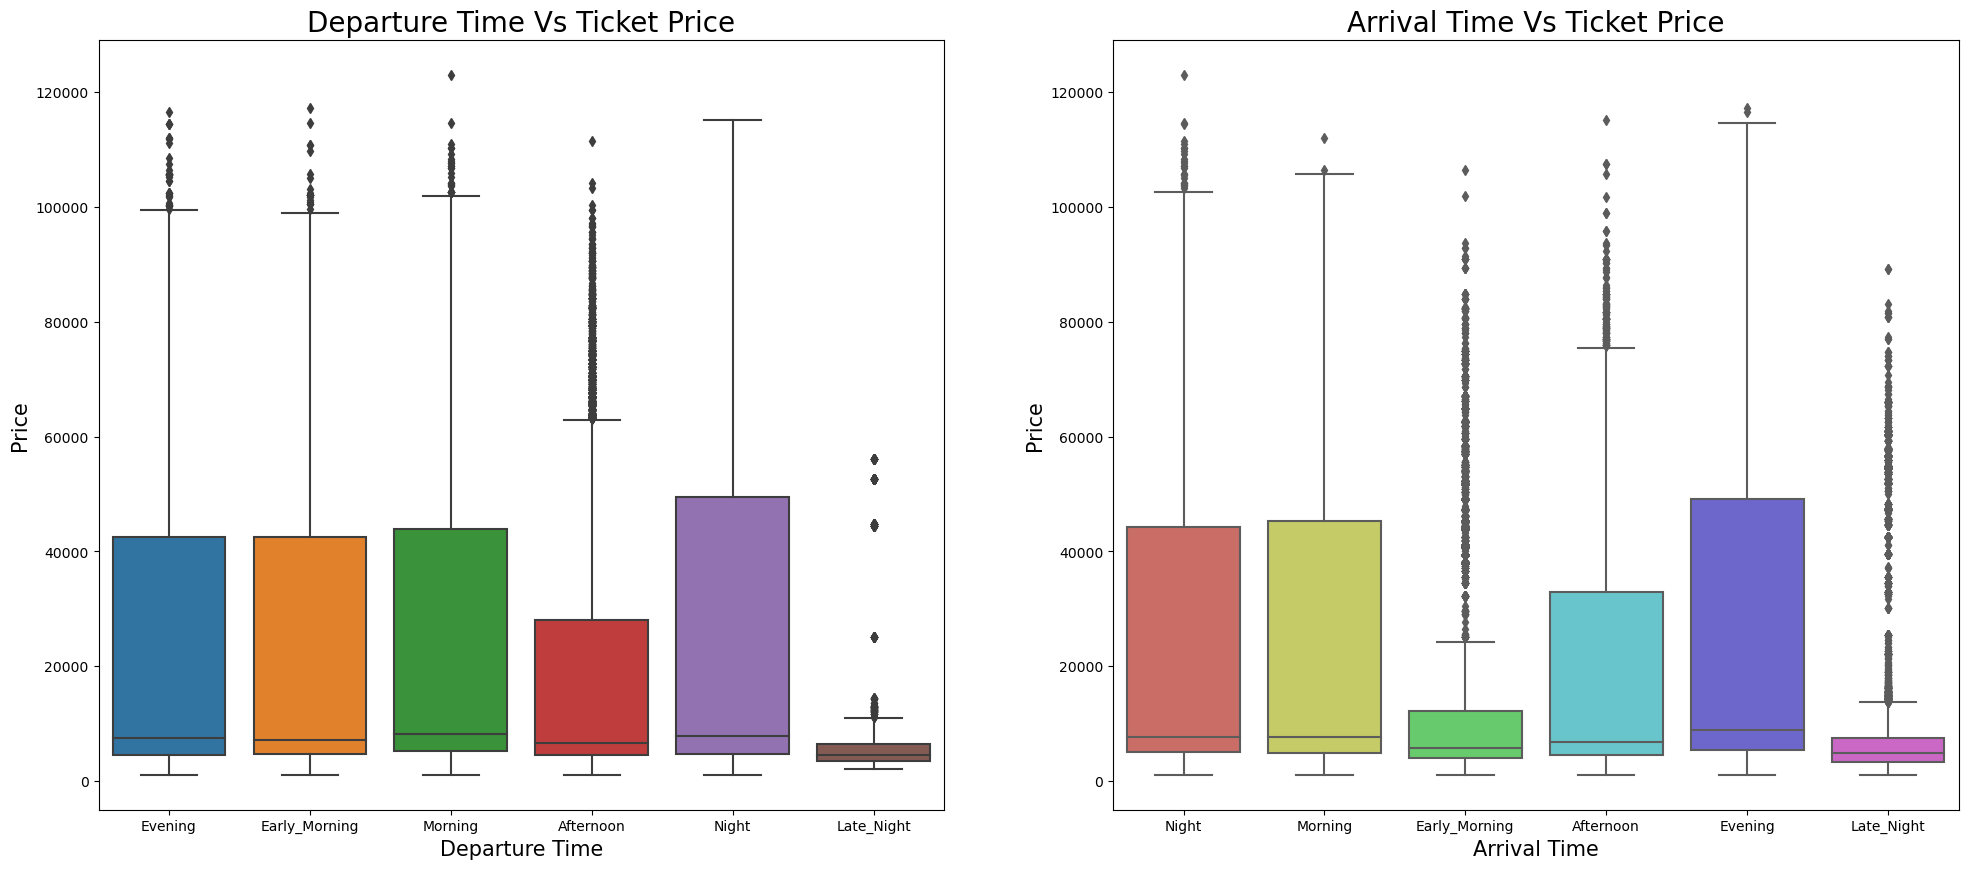

In [33]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


### How the price changes with change in Source city and Destination city?
1. Source City Vs Ticket Price:
- Ticket Price is More for the Flights whose Source City is Kolkata
- Ticket Price is almost equal for flights Having Source Cities as Mumbai and chennai , Hyderabad and Bangalore
- Ticket Price is Low for the Flights Having Source City as Delhi

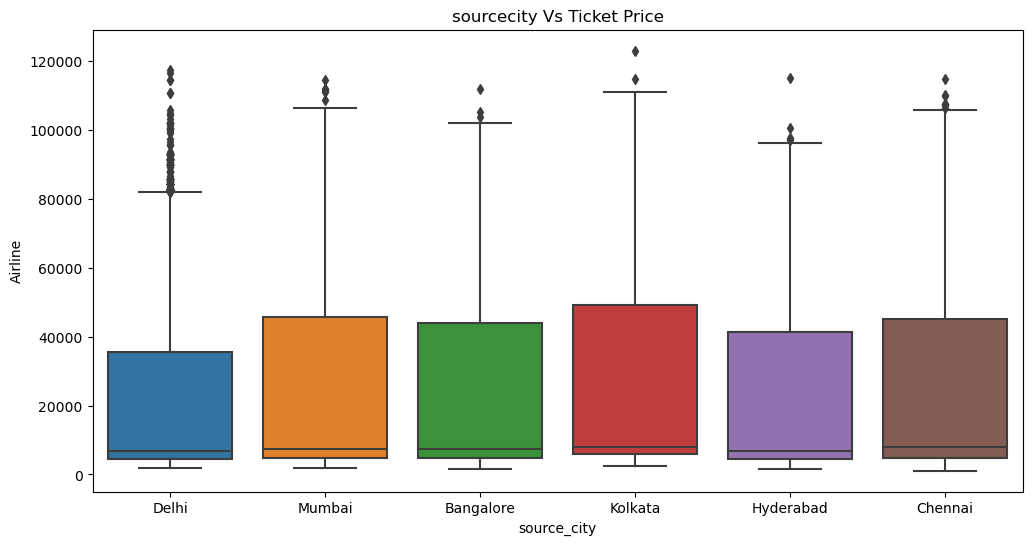

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='source_city',y='price')
plt.title('sourcecity Vs Ticket Price')
plt.xlabel('source_city')
plt.ylabel('Airline')
plt.show()

2. Destination City Vs Ticket Price
- Ticket Price is More for the Flights whose Destination City is kolkata and Chennai
- Ticket Price is almost equal for flights Having Destination Cities as Mumbai and Bangalore
- Ticket Price is Low for the Flights Having Destination City as Delhi

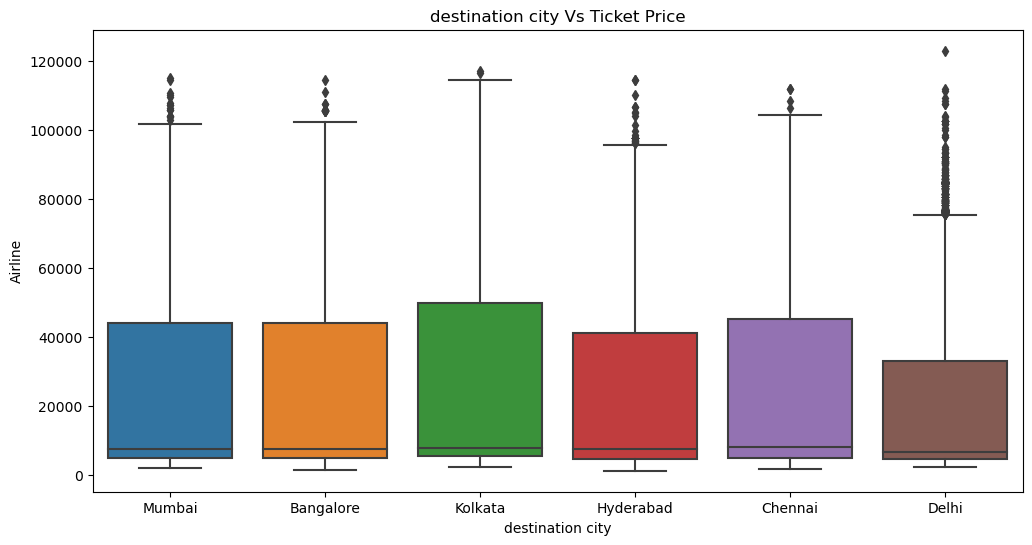

In [35]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='destination_city',y='price')
plt.title('destination city Vs Ticket Price')
plt.xlabel('destination city')
plt.ylabel('Airline')
plt.show()

### Total number of Flights from one city to another



In [36]:
df.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


### Average Price of different Airlnes from Source city to Destination city



In [43]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].agg(['mean','median'])

mean   median
airline source_city destination_city                       
AirAsia Bangalore   Chennai            2073.043478   1715.0
                    Delhi              4807.092426   3467.0
                    Hyderabad          2931.494792   1714.0
                    Kolkata            4443.468160   3393.0
                    Mumbai             3342.385350   2203.0
...                                            ...      ...
Vistara Mumbai      Bangalore         35029.880315  20684.0
                    Chennai           32181.946251  15918.0
                    Delhi             26402.695114  22140.0
                    Hyderabad         29497.578017  11664.0
                    Kolkata           35223.862417  22900.5

[177 rows x 2 columns]

# LabelEncoder_of_data

In [44]:
label=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=label.fit_transform(df[col])

In [45]:
X=df.iloc[:,:-1]
y=df['price']

In [46]:
X.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,1408,2,2,2,5,5,1,2.17,1
1,4,1387,2,1,2,4,5,1,2.33,1
2,0,1213,2,1,2,1,5,1,2.17,1
3,5,1559,2,4,2,0,5,1,2.25,1
4,5,1549,2,4,2,4,5,1,2.33,1


# Spliting_data 

In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

# scaling_data

In [50]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))

In [51]:
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

## Build_model

In [52]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelLO=linear_model.Lasso(alpha=0.1)
modelETR = ExtraTreesRegressor()

In [58]:
from sklearn import metrics

In [61]:
ml=[modelmlg,modeldcr,modelrfr,modelKNN,modelLO,modelETR]
for models in ml:
    models.fit(x_train,y_train)
    y_pred=models.predict(x_test)

    print('Model Name: ', models)
   

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    


    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904653
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1262.093
Mean Squared Error (MSE): 13751764.462
Root Mean Squared Error (RMSE): 3708.337
R2_score: 0.97328
Root Mean Squared Log Error (RMSLE): 8.218
Mean Absolute Percentage Error (MAPE): 8.63 %
Adj R Square:  0.973279
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1171.622
Mean Squared Error (MSE): 8221129.283
Root Mean Squared Error (RMSE): 2867.251
R2_score: 0.984026
Root Mean Squared Log Error (RMSLE): 7.961
Mea